## Connect Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

## Read and split training file

In [ ]:
#whole_dataset = "/content/drive/MyDrive/term project/final_training_data/merged_data.csv"
#normalized_dataset = "/content/drive/MyDrive/term project/final_training_data/normalized_merged_data.csv"
#MCI_dataset = "/content/drive/MyDrive/term project/final_training_data/MCI_data.csv"
MCI_AD = "/content/drive/MyDrive/Colab Notebooks/term project/final_training_data/lexical_result.csv"
training_df = pd.read_csv(MCI_AD)

X = training_df.drop(['name', 'AD_diagnose'] , axis=1)
y = training_df['AD_diagnose']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=20)
print(X_train.shape)
print(X_test.shape)

(420, 98)
(106, 98)


In [ ]:
MCI_AD = "/content/drive/MyDrive/term project/final_training_data/MCI_patient.csv"
training_df = pd.read_csv(MCI_AD)
print(list(training_df.keys()))
print()
print()

FileNotFoundError: ignored

In [ ]:
# Zeros = ["_" for i in range(y_train.shape[0]) if y[i] == 0]  # Normal people
Ones = ["_" for i in range(y_train.shape[0]) if y[i] == 1]  # AD people
Twos = ["_" for i in range(y_train.shape[0]) if y[i] == 2]  # MCI people
print(len(Ones), len(Twos))

317 103


## Lasso feature selection

In [ ]:
# Load a sample dataset (you can replace this with your own dataset)
MCI_AD = "/content/drive/MyDrive/Colab Notebooks/term project/final_training_data/lexical_result.csv"
training_df = pd.read_csv(MCI_AD)
X = training_df.drop(['name', 'AD_diagnose'] , axis=1)
y = training_df['AD_diagnose']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Standardize the features (important for Lasso regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.015)  # Adjust alpha for stronger/weaker regularization

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Print the coefficients of the model
print("Coefficients:", lasso_model.coef_.shape)
print("Coefficients:", lasso_model.coef_)

not_zero = 0
for i in lasso_model.coef_:
    if i != 0:
        not_zero += 1
print("not_zero", not_zero)

Coefficients: (98,)
Coefficients: [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.32800701e-02  0.00000000e+00  2.36448491e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -8.98585402e-03 -1.70122119e-02
  2.72133459e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.47513453e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.09036314e-03 -3.13711428e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -7.37308294e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -6.64214019e-03  0.00000000e+00  1.57064343e-02  0.00000000e+00
  4.22942105e-18 -0.00000000e+00 -0.00000000e+00  0.0000

In [ ]:
# Drop features with coeff 0
for i in range(len(lasso_model.coef_)-1, -1, -1):
    if lasso_model.coef_[i] == 0:
        training_df.drop(training_df.columns[i], axis = 1, inplace =True)
# for i in range(59, -1, -1):
#     if lasso_model.coef_[i] == 0:
#         training_df.drop(training_df.columns[i], axis = 1, inplace =True)
print(training_df.columns)
training_df

Index(['ADP_R', 'NOUN_R', 'NUM_R', 'PRON_R', 'AUX_R', 'PUNCT_t', 'AUX_t',
       'CCONJ_t', 'Punctuation_t', 'person_singular_verbs_t', 'time_spec_t',
       'sentence_t', 'max_mattr', 'total_brunet_index', 'good_emoji',
       'bad_emoji', 'cosine_dis', 'repeat_rate', 'average_frequency_subtlw',
       'mean_clause', 'NUM_SILENCE', 'NUM_SILENCE_RATIO', 'AD_diagnose'],
      dtype='object')


,ADP_R,NOUN_R,NUM_R,PRON_R,AUX_R,PUNCT_t,AUX_t,CCONJ_t,Punctuation_t,person_singular_verbs_t,...,total_brunet_index,good_emoji,bad_emoji,cosine_dis,repeat_rate,average_frequency_subtlw,mean_clause,NUM_SILENCE,NUM_SILENCE_RATIO,AD_diagnose
0,0.080614,0.172745,0.007678,0.117083,0.067179,0.700361,0.430046,0.466908,0.700361,0.135157,...,3038.831643,0.100000,0.150000,0.958231,0.053846,2390.724040,12.837500,124,0.812442,2
1,0.094203,0.145690,0.012586,0.150267,0.070175,0.019189,0.320977,0.395988,0.019189,0.081989,...,489.525568,0.000000,0.500000,0.561133,1.000000,1105.833483,27.182660,803,0.770293,2
2,0.088083,0.144214,0.007772,0.154577,0.067358,0.094771,0.389060,0.379084,0.094771,0.084795,...,420.959086,0.000000,0.000000,0.765450,0.400000,1730.074737,37.340909,227,0.802121,2
3,0.067751,0.121951,0.009033,0.142276,0.058717,0.977773,0.347297,0.363326,0.977773,0.138919,...,7442.457738,0.033898,0.067797,0.950744,0.031117,1420.411425,32.086957,437,0.825368,2
4,0.064683,0.122619,0.004762,0.150794,0.070635,1.240409,0.569054,0.399616,1.240409,0.191816,...,32690.753455,0.060606,0.134199,0.980669,0.009077,1273.210310,10.573529,445,0.819180,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.123077,0.200000,0.000000,0.123077,0.046154,0.746576,0.223973,0.223973,0.746576,0.074658,...,201.391110,0.111111,0.000000,0.876543,0.250000,6405.004167,6.777778,13,0.530300,1
522,0.067669,0.105263,0.000000,0.157895,0.082707,0.611753,0.269171,0.048940,0.611753,0.097881,...,469.131506,0.071429,0.000000,0.901578,0.161905,5174.290615,8.866667,39,0.499951,1
523,0.065789,0.149123,0.013158,0.149123,0.074561,0.655639,0.318453,0.206058,0.655639,0.093663,...,926.613843,0.150000,0.250000,0.935338,0.090909,3844.736667,9.913043,59,0.628723,2
524,0.134615,0.250000,0.019231,0.057692,0.038462,0.554013,0.184671,0.092336,0.554013,0.092336,...,112.902789,0.200000,0.200000,0.800000,0.500000,5718.960000,10.400000,8,0.531454,1


# Build model
## K nearest neighbors

In [ ]:
knn = KNeighborsClassifier(10) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.7880952380952381
- MCC: 0.22278783404424662
- F1 score: 0.7271195145292842
----------------------------------
Model performance for Test set
- Accuracy: 0.839622641509434
- MCC: 0.5049222732833373
- F1 score: 0.8120517154735256


## Support Vector Machine (rbf kernel)

In [ ]:
svm_rbf = SVC()
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 0.8238095238095238
- MCC: 0.42017901976333094
- F1 score: 0.7788416178716193
----------------------------------
Model performance for Test set
- Accuracy: 0.8113207547169812
- MCC: 0.4004947435409863
- F1 score: 0.7587946644550418


## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=2) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.7928571428571428
- MCC: 0.25088720050027774
- F1 score: 0.7332516602701996
----------------------------------
Model performance for Test set
- Accuracy: 0.8018867924528302
- MCC: 0.35645311547160274
- F1 score: 0.7415232995936303


## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=25, max_samples = 40) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.8047619047619048
- MCC: 0.3209989277040455
- F1 score: 0.757308201058201
----------------------------------
Model performance for Test set
- Accuracy: 0.8301886792452831
- MCC: 0.4667658941112639
- F1 score: 0.8039236706689538


## Neural network

In [ ]:
mlp = MLPClassifier(alpha=0.001, max_iter=10000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.7924528301886793
- MCC: 0.3929062867148552
- F1 score: 0.7859296085078625


## Stack Model

In [ ]:
estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.8428571428571429
- MCC: 0.5003721706451069
- F1 score: 0.8099906629318395
----------------------------------
Model performance for Test set
- Accuracy: 0.8301886792452831
- MCC: 0.4786344211304794
- F1 score: 0.7909198113207547


# Results

,Accuracy,MCC,F1
knn,0.839623,0.504922,0.812052
svm_rbf,0.811321,0.400495,0.758795
dt,0.801887,0.356453,0.741523
rf,0.830189,0.466766,0.803924
mlp,0.792453,0.392906,0.785930
stack,0.830189,0.478634,0.790920


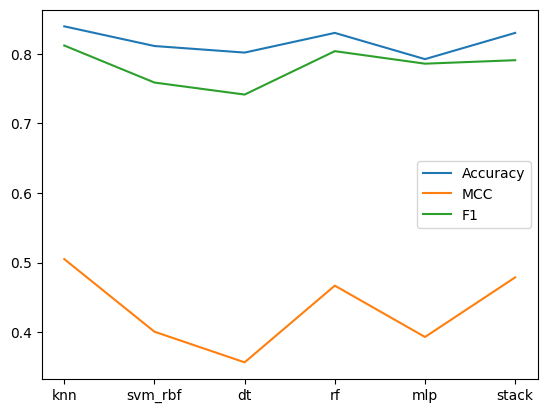

In [ ]:
acc_test_list = {'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'stack': stack_model_test_accuracy}

mcc_test_list = {'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'mlp': mlp_test_mcc,
'stack': stack_model_test_mcc}

f1_test_list = {'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'mlp': mlp_test_f1,
'stack': stack_model_test_f1}

acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df.plot(kind = "line")
df